In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(type(fashion_mnist))
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'module'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

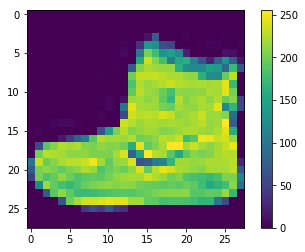

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

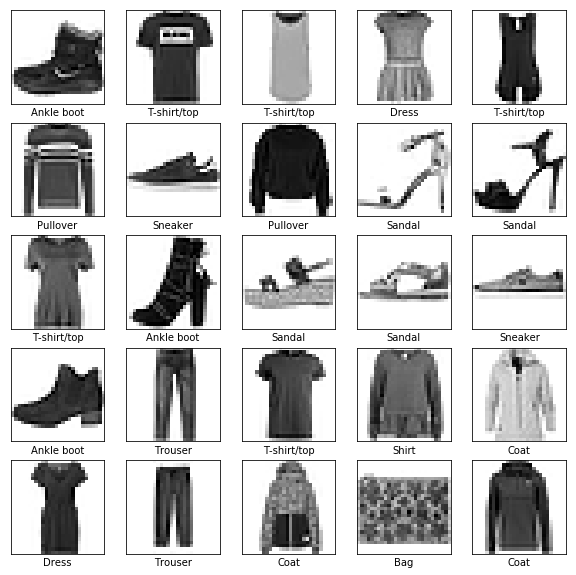

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(
    optimizer = tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.4976 - acc: 0.8256
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3716 - acc: 0.8660
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3340 - acc: 0.8784
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3069 - acc: 0.8870
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2924 - acc: 0.8934
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2789 - acc: 0.8977
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2649 - acc: 0.9021
Epoch 8/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2548 - acc: 0.9053
Epoch 9/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2453 - acc: 0.9085
Epoch 10/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2356 - acc: 0.9116

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 12.9382 - acc: 0.1971
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 12.9518 - acc: 0.1964
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 12.9193 - acc: 0.1984
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 12.9117 - acc: 0.1989
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 12.9117 - acc: 0.1989


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [15]:
print('Test accuracy: ', test_acc)

Test accuracy:  0.889


In [16]:
predictions = model.predict(test_images)

In [17]:
print(predictions[0])

[1.13465692e-09 1.57859931e-13 6.67679176e-11 4.52967333e-16
 9.98348071e-11 9.56510462e-07 3.31335619e-11 6.85651379e-04
 1.24361355e-11 9.99313354e-01]


In [18]:
print(np.argmax(predictions[0]))

9


In [19]:
print(test_labels[0])

9


In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap="binary")
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ), color=color)

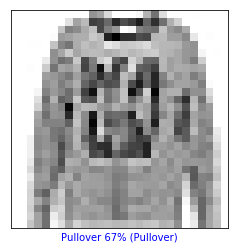

In [25]:
plot_image(500, predictions, test_labels, test_images)

In [26]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

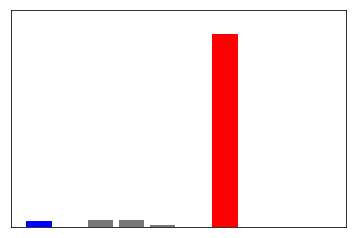

In [32]:
plot_value_array(1231, predictions, test_labels)

- Plot the first X test images, their predicted label, and the true label

- Color correct predictions in blue, incorrect predictions in red

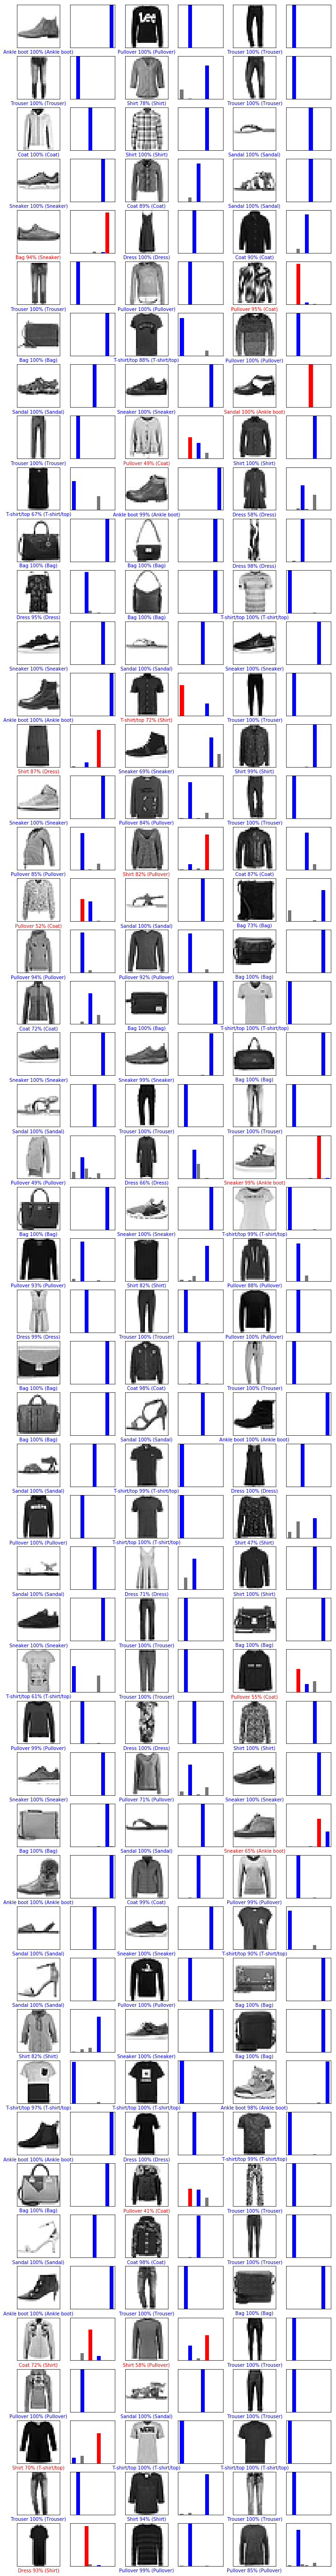

In [34]:
num_rows = 50
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [36]:
img = test_images[0]
print(img.shape)

(28, 28)


In [37]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = model.predict(img)
print(predictions_single)
print(np.argmax(predictions_single[0]))

[[1.1346526e-09 1.5785902e-13 6.6767918e-11 4.5296733e-16 9.9834807e-11
  9.5650762e-07 3.3133499e-11 6.8565010e-04 1.2436087e-11 9.9931335e-01]]
9


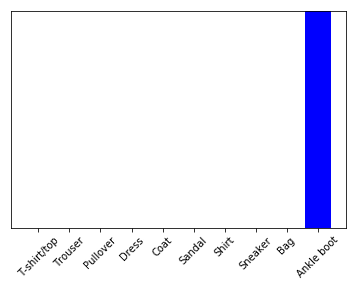

In [43]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)